In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\abdul\Downloads\Retail_Sales_Data.csv")

In [3]:
df.head()

,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity_Sold,Unit_Price,Total_Revenue,Region
0,1,2024-01-01,1051,Sports,Laptop,1,627.62,627.62,West
1,2,2024-01-02,1092,Clothing,Sofa,8,457.25,3658.00,South
2,3,2024-01-03,1014,Home Decor,Sofa,3,590.74,1772.22,East
3,4,2024-01-04,1071,Books,Laptop,3,176.33,528.99,West
4,5,2024-01-05,1060,Electronics,Novel,6,739.51,4437.06,South


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          500 non-null    int64         
 1   Date              500 non-null    datetime64[ns]
 2   Customer_ID       500 non-null    int64         
 3   Product_Category  500 non-null    object        
 4   Product_Name      500 non-null    object        
 5   Quantity_Sold     500 non-null    int64         
 6   Unit_Price        500 non-null    float64       
 7   Total_Revenue     500 non-null    float64       
 8   Region            500 non-null    object        
 9   Month             500 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(3)
memory usage: 37.2+ KB


In [4]:
# Get dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          500 non-null    int64  
 1   Date              500 non-null    object 
 2   Customer_ID       500 non-null    int64  
 3   Product_Category  500 non-null    object 
 4   Product_Name      500 non-null    object 
 5   Quantity_Sold     500 non-null    int64  
 6   Unit_Price        500 non-null    float64
 7   Total_Revenue     500 non-null    float64
 8   Region            500 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 35.3+ KB


In [24]:
df.isnull().sum()

Order_ID            0
Date                0
Customer_ID         0
Product_Category    0
Product_Name        0
Quantity_Sold       0
Unit_Price          0
Total_Revenue       0
Region              0
Month               0
dtype: int64

In [5]:
# Get summary statistics
df.describe()

,Order_ID,Customer_ID,Quantity_Sold,Unit_Price,Total_Revenue
count,500.000000,500.00000,500.000000,500.000000,500.000000
mean,250.500000,1048.87400,4.994000,498.732320,2572.735420
std,144.481833,29.56983,2.622923,285.765325,2163.990442
min,1.000000,1000.00000,1.000000,13.190000,19.240000
25%,125.750000,1023.00000,3.000000,245.667500,728.965000
50%,250.500000,1050.00000,5.000000,509.165000,1995.500000
75%,375.250000,1072.25000,7.000000,739.627500,3849.530000
max,500.000000,1099.00000,9.000000,998.360000,8967.330000


In [6]:
df.columns

Index(['Order_ID', 'Date', 'Customer_ID', 'Product_Category', 'Product_Name',
       'Quantity_Sold', 'Unit_Price', 'Total_Revenue', 'Region'],
      dtype='object')

In [7]:
# Check for missing values
df.isnull().sum()

Order_ID            0
Date                0
Customer_ID         0
Product_Category    0
Product_Name        0
Quantity_Sold       0
Unit_Price          0
Total_Revenue       0
Region              0
dtype: int64

In [8]:
df.head()

,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity_Sold,Unit_Price,Total_Revenue,Region
0,1,2024-01-01,1051,Sports,Laptop,1,627.62,627.62,West
1,2,2024-01-02,1092,Clothing,Sofa,8,457.25,3658.00,South
2,3,2024-01-03,1014,Home Decor,Sofa,3,590.74,1772.22,East
3,4,2024-01-04,1071,Books,Laptop,3,176.33,528.99,West
4,5,2024-01-05,1060,Electronics,Novel,6,739.51,4437.06,South


# # Analyze Sales Trends

In [35]:

import matplotlib.pyplot as plt

# # Convert 'Date' column to datetime format
# df["Date"] = pd.to_datetime(df["Date"])

# # Aggregate revenue by month
# monthly_sales = df.groupby(df["Date"].dt.to_period("M"))["Total_Revenue"].sum()
# monthly_sales


# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Aggregate revenue by month
monthly_sales = df.groupby(df["Date"].dt.to_period("M"))["Total_Revenue"].sum()
monthly_sales

Date
2024-01     85155.90
2024-02     79256.58
2024-03     75937.76
2024-04     87863.46
2024-05     67056.79
2024-06     74630.13
2024-07     79941.71
2024-08     75358.17
2024-09     67795.62
2024-10    103194.84
2024-11     85242.29
2024-12     76074.19
2025-01     84218.86
2025-02     58594.26
2025-03     67241.99
2025-04     78823.36
2025-05     39981.80
Freq: M, Name: Total_Revenue, dtype: float64

# Plot revenue trend
# If there’s a decline in the most recent months, further investigation is needed.

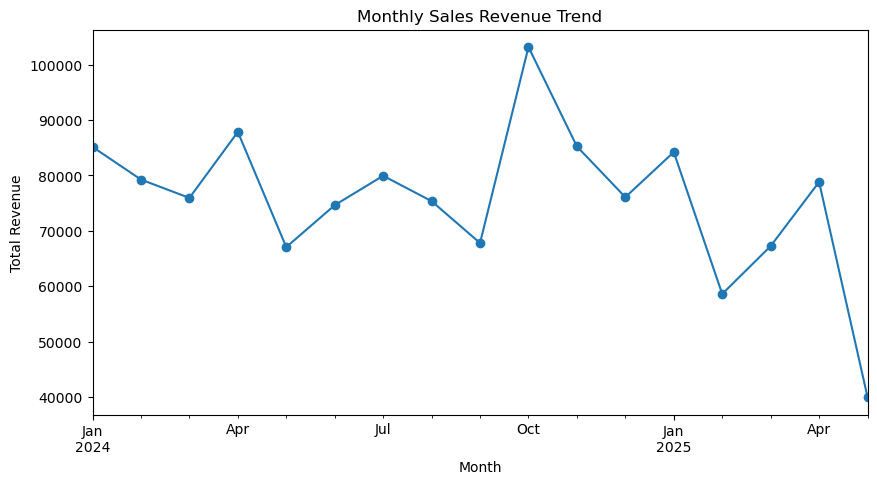

In [30]:
plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o', linestyle='-')
plt.title("Monthly Sales Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

# Identifying the Decline in Product Sales

In [11]:
category_sales = df.groupby("Product_Category")["Total_Revenue"].sum().sort_values(ascending=False)
category_sales

Product_Category
Books          301179.29
Electronics    284511.07
Clothing       272033.25
Home Decor     220984.88
Sports         207659.22
Name: Total_Revenue, dtype: float64

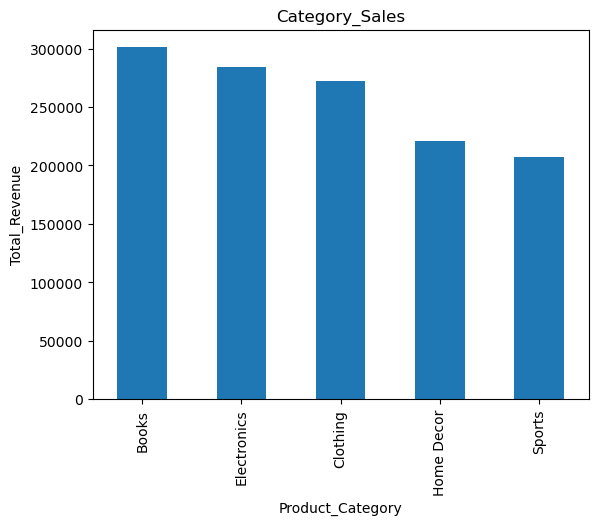

In [12]:
category_sales.plot(kind="bar", title="Category_Sales")
plt.xlabel("Product_Category")
plt.ylabel("Total_Revenue")
plt.show()

 # Comparing Sales Across Different Regions

In [13]:
region_sales = df.groupby("Region")["Total_Revenue"].sum()
region_sales

Region
East     343081.14
North    348086.91
South    265637.51
West     329562.15
Name: Total_Revenue, dtype: float64

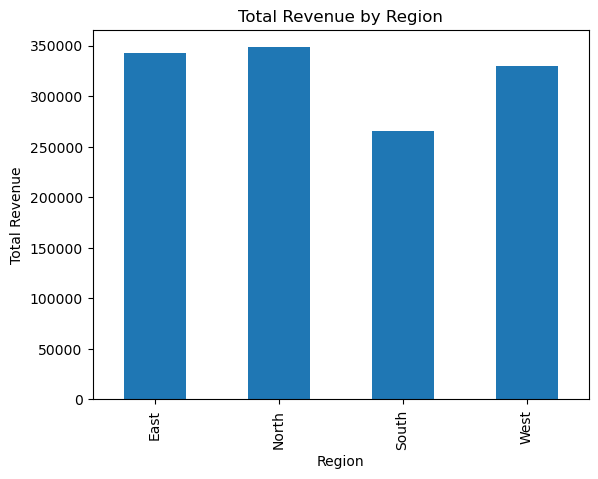

In [14]:
region_sales.plot(kind="bar", title="Total Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.show()

# Investigating Competitor Impact (Discounted Prices)

In [15]:
avg_price_per_category = df.groupby("Product_Category")["Unit_Price"].mean()
avg_price_per_category

Product_Category
Books          496.704955
Clothing       496.297059
Electronics    536.069612
Home Decor     498.901573
Sports         463.075789
Name: Unit_Price, dtype: float64

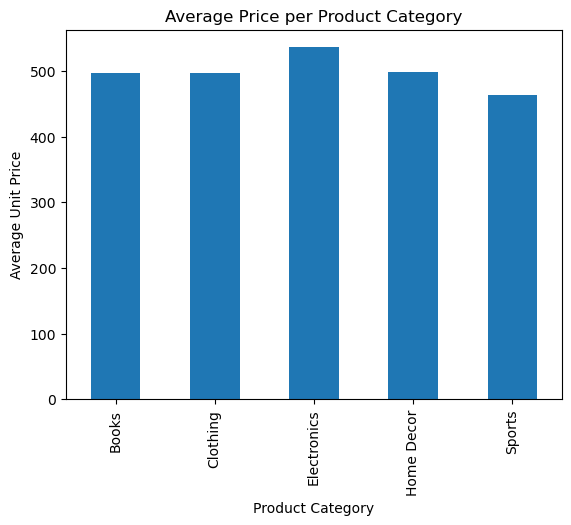

In [16]:
avg_price_per_category.plot(kind="bar", title="Average Price per Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Unit Price")
plt.show()

# Check the Effect of Promotions

In [17]:
df["Month"] = df["Date"].dt.month
sales_before_promo = df[df["Month"] < 3].groupby("Product_Category")["Total_Revenue"].sum()
sales_after_promo = df[df["Month"] >= 3].groupby("Product_Category")["Total_Revenue"].sum()
promo_comparison = pd.DataFrame({"Before Promo": sales_before_promo, "After Promo": sales_after_promo})
promo_comparison

,Before Promo,After Promo
Product_Category,,
Books,57509.68,243669.61
Clothing,64902.46,207130.79
Electronics,85718.01,198793.06
Home Decor,37704.02,183280.86
Sports,61391.43,146267.79


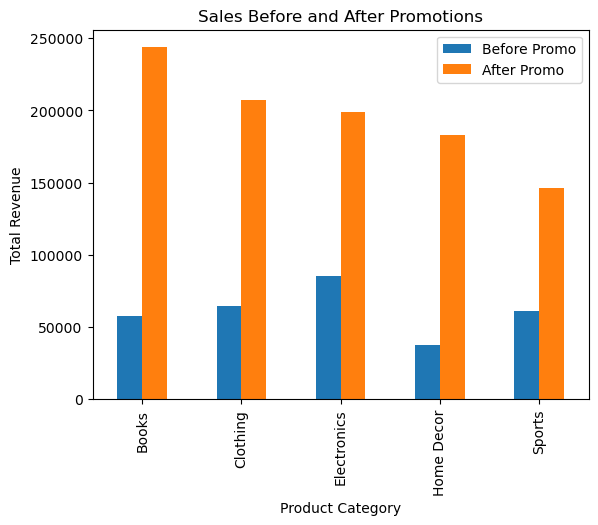

In [18]:
promo_comparison.plot(kind="bar", title="Sales Before and After Promotions")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.show()

# Optimize Pricing Strategy

In [44]:
df["Suggested_Price"] = df["Unit_Price"] * 0.9
df[["Product_Name", "Unit_Price", "Suggested_Price"]].head(10)

,Product_Name,Unit_Price,Suggested_Price
0,Laptop,627.62,564.858
1,Sofa,457.25,411.525
2,Sofa,590.74,531.666
3,Laptop,176.33,158.697
4,Novel,739.51,665.559
5,Basketball,864.17,777.753
6,Basketball,224.57,202.113
7,T-shirt,104.76,94.284
8,Novel,33.40,30.060
9,Sofa,645.55,580.995


# implement Customer Loyalty Programs

In [50]:
top_customers = df.groupby("Customer_ID")["Total_Revenue"].sum().sort_values(ascending=False).head(10)
print(top_customers)

Customer_ID
1032    39225.65
1001    33360.14
1034    32499.62
1098    28239.58
1020    25943.00
1095    24439.39
1000    24054.73
1053    24002.84
1091    23970.29
1092    23241.13
Name: Total_Revenue, dtype: float64


# Final Recommendations
# 1. Adjust Pricing: Reduce unit prices by 10% on affected products.
# 2. Promotions & Discounts: Offer targeted promotions in underperforming categories.
# 3. Regional Targeting: Increase marketing in regions with declining sales.
# 4. Customer Engagement: Implement a loyalty program for frequent customers.
# 5. Competitive Monitoring: Regularly check competitor pricing and discounts.